In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('breast-cancer.csv')
df.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
150,871001501,B,13.000,20.78,83.51,519.4,0.11350,0.07589,0.03136,0.02645,...,14.16,24.11,90.82,616.7,0.1297,0.11050,0.08112,0.06296,0.3196,0.06435
204,87930,B,12.470,18.60,81.09,481.9,0.09965,0.10580,0.08005,0.03821,...,14.97,24.64,96.05,677.9,0.1426,0.23780,0.26710,0.10150,0.3014,0.08750
414,905680,M,15.130,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.02739,...,17.26,36.91,110.10,931.4,0.1148,0.09866,0.15470,0.06575,0.3233,0.06165
242,883852,B,11.300,18.19,73.93,389.4,0.09592,0.13250,0.15480,0.02854,...,12.58,27.96,87.16,472.9,0.1347,0.48480,0.74360,0.12180,0.3308,0.12970
127,866203,M,19.000,18.91,123.40,1138.0,0.08217,0.08028,0.09271,0.05627,...,22.32,25.73,148.20,1538.0,0.1021,0.22640,0.32070,0.12180,0.2841,0.06541
16,848406,M,14.680,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.05259,...,19.07,30.88,123.40,1138.0,0.1464,0.18710,0.29140,0.16090,0.3029,0.08216
465,9113239,B,13.240,20.13,86.87,542.9,0.08284,0.12230,0.10100,0.02833,...,15.44,25.50,115.00,733.5,0.1201,0.56460,0.65560,0.13570,0.2845,0.12490
488,913512,B,11.680,16.17,75.49,420.5,0.11280,0.09263,0.04279,0.03132,...,13.32,21.59,86.57,549.8,0.1526,0.14770,0.14900,0.09815,0.2804,0.08024
70,859575,M,18.940,21.31,123.60,1130.0,0.09009,0.10290,0.10800,0.07951,...,24.86,26.58,165.90,1866.0,0.1193,0.23360,0.26870,0.17890,0.2551,0.06589
21,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,...,10.23,15.66,65.13,314.9,0.1324,0.11480,0.08867,0.06227,0.2450,0.07773


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
df.drop(['id'],inplace=True,axis=1)

In [10]:
x = df.drop(['diagnosis'],axis=1).values
y = df[['diagnosis']].values

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
x_train.shape,x_test.shape

((455, 30), (114, 30))

In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

/home/janardhan/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/janardhan/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,knn.predict(x_test))

0.9473684210526315

In [28]:
for i in range(1,16):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    print(i,accuracy_score(y_test,knn.predict(x_test)))

1 0.9385964912280702
2 0.9473684210526315
3 0.9473684210526315
4 0.956140350877193
5 0.9473684210526315
6 0.956140350877193
7 0.9473684210526315
8 0.956140350877193
9 0.9649122807017544
10 0.956140350877193
11 0.956140350877193
12 0.956140350877193
13 0.956140350877193
14 0.956140350877193
15 0.956140350877193


In [59]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import numpy as np
def plot_regions(k):
    plt.scatter(x_train[:,0],x_train[:,1])

    space = []
    for col in range(x_train.shape[1]):
        col = x_train[:,col]
        mesh = np.linspace(col.min()-1,col.max()+1,num=50)
        space.append(mesh)
    # space = np.array(space)
    # print(space.shape)
    data = np.array(np.meshgrid(*space))
    print(data)
    print(data.shape)

ValueError: broadcast dimensions too large.

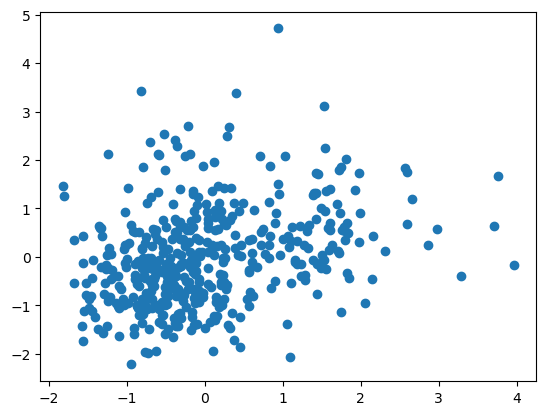

In [60]:
plot_regions(5)